In [1]:
import pickle
import matplotlib.pyplot as plt

from agent import RandomAgent, SimpleHeuristicAgent, AverageHeuristicAgent, DeepQAgent

In [2]:
n_pretrain = 5
n_samples = 1
n_episodes = 2

def get_agents():
    agents = {
        'random': RandomAgent(),
        # 'random': DeepQAgent(epsilon_init=1, epsilon_final=1),
        'deep_q': DeepQAgent(epsilon_init=1, epsilon_final=0.1),
        'simple_heuristic': SimpleHeuristicAgent(),
        'average_heuristic': AverageHeuristicAgent(),
    }
    return agents

agents = get_agents()

histories = { agent_name: list() for agent_name in agents }

for _ in range(n_pretrain):
    for agent_name in agents:
        agent = agents[agent_name]
        if agent.trainable:
            print(f'Training {agent_name}...{" "*30}', end='\r')
            agent.schedule_epoch(n_episodes)
            agent.reset_state()
    # agents = get_agents()

for i in range(n_samples):
    for agent_name in agents:
        agent = agents[agent_name]
        print(f'Testing {agent_name}...{" "*30}', end='\r')
        histories[agent_name].append(agent.schedule_epoch(n_episodes, learn=False))
        if i != n_samples - 1:
            agent.reset_state()
    # agents = get_agents()

In [3]:
# with open('pickle/{fname}_histories.pkl', 'rb') as f:
#     history = pickle.load(f)

In [4]:
fname = 'random_heuristic_epsilon'

with open(f'pickle/{fname}_histories.pkl', 'wb') as f:
    pickle.dump(histories, f)

In [5]:
def plot_histories(ax, histories, label):
    # histories = [h1, ..., hn]
    # where each hi is a list of rewards for each episode.
    # Plots the average reward for each episode
    # and the min-max range.
    n_agents = len(histories)
    n_episodes = len(histories[0])
    rewards = [sum(rewards) for rewards in zip(*histories)]
    avg_rewards = [reward / n_agents for reward in rewards]
    rewards_sorted = [sorted(rewards) for rewards in zip(*histories)]
    lower_bound = [rewards[int(0 * n_agents)] for rewards in rewards_sorted]
    upper_bound = [rewards[int(1 * n_agents) - 1] for rewards in rewards_sorted]
    ax.plot(avg_rewards, label=label)
    ax.fill_between(range(n_episodes), lower_bound, upper_bound, alpha=0.2)

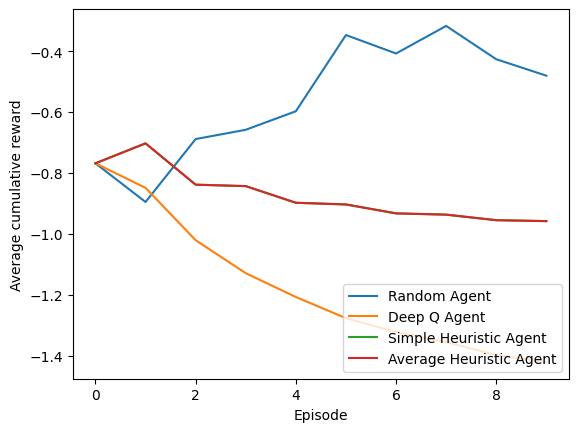

In [6]:
fig, ax = plt.subplots()
plot_histories(ax, histories['random'], 'Random Agent')
plot_histories(ax, histories['deep_q'], 'Deep Q Agent')
plot_histories(ax, histories['simple_heuristic'], 'Simple Heuristic Agent')
plot_histories(ax, histories['average_heuristic'], 'Average Heuristic Agent')
min_avg_reward = min(min([sum(rewards) / len(rewards) for rewards in zip(*histories[i])] for i in histories))
buffer = 2
# ax.set_ylim(buffer * min_avg_reward, 0)
ax.set_xlabel('Episode')
ax.set_ylabel('Average cumulative reward')
ax.legend(loc='lower right')
plt.savefig(f'figures/{fname}_reward.pdf')
plt.show()

In [11]:
agent = agents['deep_q']
agent.print_schedule()

+---+---+---+---+---+
|   |   |   |   |   |
| 8 | 8 | 8 | 8 | 8 |
|   |   |   |   |   |
+---+---+---+---+---+
|   |   |   |   |   |
| 5 | 5 | 5 | 5 | 5 |
|   |   |   |   |   |
+---+---+---+---+---+
|   |   |   |   |   |
| 1 | 1 | 1 | 1 | 1 |
|   |   |   |   |   |
+---+---+---+---+---+
|   |   |   |   |   |
| 3 | 3 | 3 | 3 | 3 |
|   |   |   |   |   |
+---+---+---+---+---+
|   |   |   |   |   |
| 0 | 2 | 2 | 0 | 2 |
|   |   |   |   |   |
+---+---+---+---+---+



In [8]:
agent = agents['deep_q']
mem = agent.memory.memory
n = len(mem)
for i in range(n):
    transition = mem[i]
    print(f'State:\t\t{transition.state[0,agent.n_doctors:]}')
    print(f'Action:\t\t{transition.action}')
    print(f'Reward:\t\t{transition.reward}')
    print(f'Diff:\t\t{transition.next_state[0,agent.n_doctors:] - transition.state[0,agent.n_doctors:]}')
    print()

    print(agent.q(transition.state).detach())
    print()

State:		tensor([])
Action:		tensor([[2]])
Reward:		tensor([[0.]])
Diff:		tensor([])

tensor([[ 0.0874,  0.2166,  0.1434,  0.2396, -0.0467,  0.1926, -0.1401,  0.1486,
          0.3130]])

State:		tensor([])
Action:		tensor([[0]])
Reward:		tensor([[-1.6667]])
Diff:		tensor([])

tensor([[ 0.1375,  0.1992,  0.1537,  0.2320, -0.0461,  0.2159, -0.1654,  0.1799,
          0.3273]])

State:		tensor([])
Action:		tensor([[1]])
Reward:		tensor([[-1.8689]])
Diff:		tensor([])

tensor([[ 0.1259,  0.2581,  0.2074,  0.2789,  0.0353,  0.2586, -0.0953,  0.1455,
          0.3980]])

State:		tensor([])
Action:		tensor([[6]])
Reward:		tensor([[-2.0546]])
Diff:		tensor([])

tensor([[ 0.1711,  0.3962,  0.1737,  0.3290, -0.1588,  0.2770, -0.1435,  0.1081,
          0.4851]])

State:		tensor([])
Action:		tensor([[4]])
Reward:		tensor([[-2.0928]])
Diff:		tensor([])

tensor([[ 0.1754,  0.2920,  0.1080,  0.4809, -0.2917,  0.3099, -0.2733,  0.1185,
          0.5818]])

State:		tensor([])
Action:		tensor([[0]])
Rew